In [2]:
import itertools
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

# Metrics
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score

# Utilities
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.model_selection import train_test_split

In [3]:
pd.options.display.max_columns = 100

In [4]:
def plot_confusion_matrix( cm, classes,
                          normalize = False,
                          title = 'Confusion Matrix',
                          cmap = plt.cm.Blues ):
    
    if normalize:
        cm = cm.astype( 'float' ) / cm.sum( axis = 1 )[ :, np.newaxis ]
        print( 'Normalized confusion matrix' )
    else:
        print( 'Confusion matrix, without normalization' )

    #print( cm )

    plt.imshow( cm, interpolation = 'nearest', cmap = cmap )
    plt.title( title )
    plt.colorbar()
    tick_marks = np.arange( len( classes ) )
    plt.xticks( tick_marks, classes, rotation = 45 )
    plt.yticks( tick_marks, classes )

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product( range( cm.shape[ 0 ] ), range( cm.shape[ 1 ] ) ):
        plt.text( j, i, format( cm[ i, j ], fmt ),
                 horizontalalignment = 'center',
                 color = 'white' if cm[ i, j ] > thresh else 'black' )

    plt.tight_layout()
    plt.ylabel( 'True label' )
    plt.xlabel( 'Predicted label' )

# Importando el dataset

In [5]:
music_df = pd.read_csv( './data/msd_genre_dataset.txt' )

In [6]:
music_df.shape

(59600, 34)

In [7]:
music_df.dtypes

genre              object
track_id           object
artist_name        object
title              object
loudness          float64
tempo             float64
time_signature      int64
key                 int64
mode                int64
duration          float64
avg_timbre1       float64
avg_timbre2       float64
avg_timbre3       float64
avg_timbre4       float64
avg_timbre5       float64
avg_timbre6       float64
avg_timbre7       float64
avg_timbre8       float64
avg_timbre9       float64
avg_timbre10      float64
avg_timbre11      float64
avg_timbre12      float64
var_timbre1       float64
var_timbre2       float64
var_timbre3       float64
var_timbre4       float64
var_timbre5       float64
var_timbre6       float64
var_timbre7       float64
var_timbre8       float64
var_timbre9       float64
var_timbre10      float64
var_timbre11      float64
var_timbre12      float64
dtype: object

In [8]:
music_df.head()

,genre,track_id,artist_name,title,loudness,tempo,time_signature,key,mode,duration,avg_timbre1,avg_timbre2,avg_timbre3,avg_timbre4,avg_timbre5,avg_timbre6,avg_timbre7,avg_timbre8,avg_timbre9,avg_timbre10,avg_timbre11,avg_timbre12,var_timbre1,var_timbre2,var_timbre3,var_timbre4,var_timbre5,var_timbre6,var_timbre7,var_timbre8,var_timbre9,var_timbre10,var_timbre11,var_timbre12
0,classic pop and rock,TRFCOOU128F427AEC0,Blue Oyster Cult,Mes Dames Sarat,-8.697,155.007,1,9,1,246.33424,46.673067,14.613684,14.664215,0.176561,-9.346377,-12.341699,11.183382,7.405288,9.313765,3.201169,-0.152734,5.809709,14.930820,802.205948,1255.514569,580.030472,598.485223,575.337671,322.068603,321.726029,232.700609,186.805303,181.938688,151.508011
1,classic pop and rock,TRNJTPB128F427AE9F,Blue Oyster Cult,Screams,-10.659,148.462,1,4,0,189.80526,43.645377,-87.337150,41.051582,7.814770,-12.989848,-14.253599,6.126045,-2.448662,22.691713,-2.872706,1.427725,-6.710730,22.704843,1561.307072,2007.653070,1043.474073,585.694981,564.013736,510.177022,400.200186,365.119588,238.099708,197.933757,251.577525
2,classic pop and rock,TRLFJHA128F427AEEA,Blue Oyster Cult,Dance The Night Away,-13.494,112.909,1,10,0,158.19710,37.573538,-61.202030,28.760533,-13.788123,10.062347,-4.872030,-14.090243,5.580175,15.414011,4.556137,-1.877363,20.879475,58.459621,4644.001846,1204.856777,2736.520024,730.233239,665.203452,535.775111,439.335059,486.822970,265.333860,447.097987,251.880724
3,classic pop and rock,TRCQZAG128F427DB97,Blue Oyster Cult,Debbie Denise,-12.786,117.429,4,7,1,250.22649,42.566615,17.217897,53.484213,1.564362,-8.884632,-13.088890,-9.762620,1.373769,1.092876,1.479490,1.517015,8.562618,22.575460,691.140671,809.755802,563.908070,492.803819,378.382799,372.875044,231.941957,246.313305,168.400152,85.282462,339.897173
4,classic pop and rock,TRNXMNM128F427DB8C,Blue Oyster Cult,(Don't Fear) The Reaper,-14.093,141.536,4,9,0,307.06893,40.976507,-13.609779,39.566169,-5.602033,-17.754819,-21.833261,-5.600732,2.291770,3.526177,1.535449,2.763958,3.388757,34.294994,1062.180815,1093.684935,343.556047,889.163314,218.111796,304.862864,178.352161,440.478867,142.669283,81.061326,208.355152


In [9]:
music_df[ 'genre' ].value_counts()

classic pop and rock     23895
folk                     13192
dance and electronica     4935
jazz and blues            4334
soul and reggae           4016
punk                      3200
metal                     2103
classical                 1874
pop                       1617
hip-hop                    434
Name: genre, dtype: int64

# 1. Identificación de los generos musicales metal y pop

In [10]:
genres = [ 'metal', 'pop' ]
music_df_filter = music_df.loc[ music_df[ 'genre' ].isin( genres ) ]

In [11]:
music_df_filter.head()

,genre,track_id,artist_name,title,loudness,tempo,time_signature,key,mode,duration,avg_timbre1,avg_timbre2,avg_timbre3,avg_timbre4,avg_timbre5,avg_timbre6,avg_timbre7,avg_timbre8,avg_timbre9,avg_timbre10,avg_timbre11,avg_timbre12,var_timbre1,var_timbre2,var_timbre3,var_timbre4,var_timbre5,var_timbre6,var_timbre7,var_timbre8,var_timbre9,var_timbre10,var_timbre11,var_timbre12
40287,pop,TRWKGZR128F42883E3,Luis Miguel,Hoy El Aire Huele A Ti,-8.428,145.690,4,9,1,224.49587,45.528977,16.181933,34.686412,4.506012,5.937816,-13.605629,-2.214132,-5.387347,11.167171,-0.336125,1.511006,3.025289,36.072462,1770.544281,1972.858718,907.455456,886.316346,600.333824,579.893067,339.424356,519.923739,264.845525,185.466831,316.681406
40288,pop,TRYHIIS128F4234DAF,Luis Miguel,Devuelveme el amor,-9.329,140.126,4,9,0,245.49832,43.813997,-50.703744,11.164904,-11.083495,4.625656,-12.963336,-6.143509,-5.344436,9.273057,0.170565,-1.088154,0.361330,35.099001,2443.623730,1219.985058,1070.126280,777.468030,498.865095,519.771012,501.193160,544.449133,262.825606,202.608719,337.458954
40289,pop,TRMVKIL128F428866C,Luis Miguel,Ese Momento,-9.637,144.065,4,9,0,229.19791,42.434609,-13.108341,13.230432,-4.129279,-2.921126,-5.666878,-4.777159,4.074388,7.690105,4.640916,-5.126311,-5.398568,42.454557,2495.703587,1324.887418,1533.015283,942.553247,745.562857,550.895257,489.570832,526.053075,325.514211,288.119931,376.043521
40290,pop,TRGPUKW128F4288669,Luis Miguel,No Me Fio,-7.535,154.137,4,0,0,225.33179,44.677827,21.712237,28.135888,-3.333904,16.805565,-11.780735,-12.372888,-0.500345,11.974180,2.292725,-1.742028,-1.130716,43.243344,1718.047292,1385.741123,1367.143018,1023.396094,625.073490,536.857267,472.408919,499.400257,282.529973,216.302737,366.740840
40291,pop,TRILCRD128F428866D,Luis Miguel,Amarte Es Un Placer,-10.245,88.558,3,10,1,211.74812,42.442428,-11.211632,13.050407,-16.627853,-3.272981,-11.088556,-7.789226,-0.106525,6.489357,0.693170,-4.687682,-0.343357,38.987195,2459.131628,2452.029944,1829.433435,911.908313,614.678948,569.082225,439.161784,523.959660,285.902157,276.983012,547.808527


# Clase negativa Metal- Clase positiva POP

Usualmente la clase negativa es la más grande y la positiva la más pequeña

In [12]:
music_df_filter.loc[ music_df_filter[ 'genre' ] == 'metal', 'genre' ] = 0
music_df_filter.loc[ music_df_filter[ 'genre' ] == 'pop', 'genre' ] = 1

D:\programasAparte\Anaconda\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [13]:
music_df_filter[ 'genre' ].value_counts( dropna = False )

0    2103
1    1617
Name: genre, dtype: int64

In [14]:
X = music_df_filter[ music_df_filter.columns.tolist()[ 4: ] ]

In [15]:
Y = music_df_filter[ 'genre' ]

In [16]:
X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size = 0.3 )

In [17]:
X_train.shape

(2604, 30)

In [18]:
X_test.shape

(1116, 30)

# Preprocessing

# 4. Escalado de variables

#### Rangos iniciales variables dataframes

In [20]:
X_train.describe()

,loudness,tempo,time_signature,key,mode,duration,avg_timbre1,avg_timbre2,avg_timbre3,avg_timbre4,avg_timbre5,avg_timbre6,avg_timbre7,avg_timbre8,avg_timbre9,avg_timbre10,avg_timbre11,avg_timbre12,var_timbre1,var_timbre2,var_timbre3,var_timbre4,var_timbre5,var_timbre6,var_timbre7,var_timbre8,var_timbre9,var_timbre10,var_timbre11,var_timbre12
count,2604.000000,2604.000000,2604.000000,2604.000000,2604.000000,2604.000000,2604.000000,2604.000000,2604.000000,2604.000000,2604.000000,2604.000000,2604.000000,2604.000000,2604.000000,2604.000000,2604.000000,2604.000000,2604.000000,2604.000000,2604.000000,2604.000000,2604.000000,2604.000000,2604.000000,2604.000000,2604.000000,2604.000000,2604.000000,2604.000000
mean,-7.293567,128.577445,3.718894,5.314516,0.637097,252.408562,46.832458,27.155834,13.277328,-3.553720,-14.865665,-15.055178,-1.638039,-1.799101,6.417283,3.877871,-0.387805,3.190496,28.481941,1808.269604,1498.556226,1106.578026,796.992177,660.571214,497.030080,391.694133,323.451365,253.589950,223.644280,255.630651
std,3.369421,35.983437,1.186139,3.582699,0.480930,107.398482,4.528994,40.878780,24.078239,11.558630,24.068225,11.017258,12.822611,5.914771,9.423118,5.892930,3.194945,7.576266,21.528341,1513.957248,1059.953699,812.695906,408.885702,397.795425,270.057102,243.953893,177.776346,136.047513,134.317727,143.027064
min,-28.917000,0.000000,0.000000,0.000000,0.000000,6.843630,19.807814,-166.670427,-94.290527,-47.710321,-137.779000,-41.688385,-77.496969,-32.500173,-70.692450,-21.523574,-25.321878,-40.488174,0.810455,112.294714,150.279563,124.117331,116.294185,84.417581,85.318034,60.610087,44.135621,21.861296,37.231937,46.426135
25%,-9.015500,100.425750,4.000000,2.000000,0.000000,198.569340,44.227960,3.517732,0.017178,-10.375322,-31.165948,-23.681246,-9.756482,-5.407086,0.599366,-0.025972,-2.272053,-1.396216,12.381480,827.133121,724.326671,574.066551,519.425853,390.672270,303.163359,242.485209,215.470805,165.054030,137.647320,158.176457
50%,-6.573000,124.469500,4.000000,5.000000,1.000000,235.702400,47.499174,31.105220,13.890322,-4.322939,-15.317013,-16.210062,-1.808872,-1.724243,6.346530,4.340061,-0.321218,2.728985,23.558150,1474.169501,1288.566552,922.437966,720.922771,562.470158,443.087010,348.768067,286.525162,229.946765,190.947119,230.001191
75%,-4.978750,149.699250,4.000000,9.000000,1.000000,284.969342,50.197368,54.602007,26.840471,2.508624,2.988815,-8.366240,6.952954,1.904648,12.337494,8.067134,1.493711,7.487961,38.718993,2248.857518,1965.539440,1424.849219,978.103130,831.917946,626.759130,488.136532,388.525370,314.055072,276.126988,320.853013
max,-0.205000,250.332000,7.000000,11.000000,1.000000,2390.203630,55.567055,161.506928,202.846549,76.577478,77.766938,60.600486,50.228389,20.173355,48.120922,24.627562,14.622630,55.835938,220.598889,24313.380409,14286.270884,11758.310773,4693.627511,3711.462606,3630.722525,3741.866434,3101.172111,2352.679280,1461.783282,2629.604610


<AxesSubplot:>

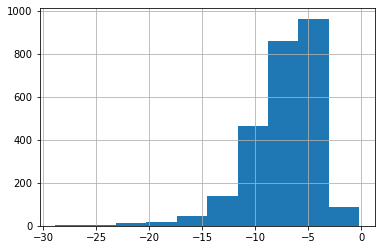

In [21]:
X_train["loudness"].hist()

In [22]:
X_test.describe()

,loudness,tempo,time_signature,key,mode,duration,avg_timbre1,avg_timbre2,avg_timbre3,avg_timbre4,avg_timbre5,avg_timbre6,avg_timbre7,avg_timbre8,avg_timbre9,avg_timbre10,avg_timbre11,avg_timbre12,var_timbre1,var_timbre2,var_timbre3,var_timbre4,var_timbre5,var_timbre6,var_timbre7,var_timbre8,var_timbre9,var_timbre10,var_timbre11,var_timbre12
count,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000
mean,-7.138048,129.454502,3.700717,5.471326,0.634409,250.530802,46.977312,27.569218,13.017574,-3.539881,-15.509183,-15.623555,-1.768430,-1.769848,6.564130,4.154770,-0.221336,2.767734,29.557373,1789.683520,1454.740512,1095.239010,782.402308,651.170352,490.860830,392.018010,315.847727,254.012578,219.106075,244.993382
std,3.345677,34.532489,1.100363,3.557860,0.481812,87.350254,4.600761,38.914079,23.565135,10.974018,22.677321,10.664276,12.572802,5.841386,8.744695,5.601975,3.204975,7.194412,22.375163,1419.026571,1061.500725,896.086844,441.391688,409.524288,269.752460,285.418215,154.112312,168.981671,137.760410,124.731111
min,-28.684000,30.104000,1.000000,0.000000,0.000000,13.060770,20.311898,-142.883728,-85.450605,-43.704134,-96.622299,-37.975142,-56.544101,-29.787911,-25.859694,-16.356660,-31.350857,-25.190775,1.648872,167.875567,131.584215,128.794350,161.395548,93.235585,100.120842,84.364876,54.427847,53.088645,51.783184,46.342437
25%,-8.649250,103.071500,4.000000,2.000000,0.000000,200.273830,44.496298,5.325858,-0.184482,-10.649259,-32.512858,-23.692175,-10.278545,-5.394392,0.696762,0.498384,-2.024076,-1.683020,12.273308,782.385754,681.931081,566.251600,508.137519,382.759728,291.737889,230.678436,208.519692,157.838854,134.499362,156.805867
50%,-6.437500,124.072500,4.000000,6.000000,1.000000,235.911385,47.633450,32.800806,14.354929,-4.115322,-16.696510,-17.338182,-2.254269,-1.446250,6.497472,4.465434,-0.174542,2.344733,23.429209,1448.743712,1208.055278,877.431965,717.525219,561.201860,433.892327,337.739960,283.670598,226.105652,185.083386,220.821664
75%,-4.833500,149.825250,4.000000,9.000000,1.000000,283.506483,50.399398,55.153057,26.811439,2.429828,1.852858,-9.105378,6.277130,1.914432,12.105041,8.018665,1.562095,7.126860,41.022994,2334.225781,1928.139016,1333.796566,947.248009,797.875082,621.304211,488.558424,384.899664,305.100490,263.893543,309.265867
max,-0.227000,253.036000,7.000000,11.000000,1.000000,1073.579950,55.206926,130.901682,141.672338,50.773003,53.240432,58.418449,49.892265,16.716551,41.458760,23.314347,13.566470,42.080230,154.852607,11449.875902,14852.043066,10084.776293,8212.825633,4097.375165,2551.504930,3317.312117,1239.808997,2261.140932,1351.777392,1685.464627


<AxesSubplot:>

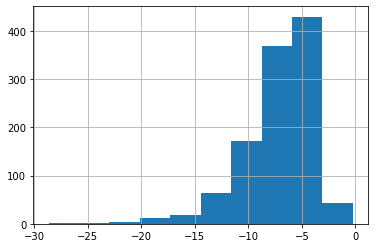

In [23]:
X_test["loudness"].hist()

#### Aplicación del método de escalado

In [27]:
scaler = StandardScaler()
X_train_standardScaler = scaler.fit_transform( X_train )

In [28]:
X_test_standardScaler = scaler.transform( X_test )

#### Rangos escalados variables dataframes

In [29]:
pd.DataFrame(X_train_standardScaler, columns = music_df.columns[4:]).describe()

,loudness,tempo,time_signature,key,mode,duration,avg_timbre1,avg_timbre2,avg_timbre3,avg_timbre4,avg_timbre5,avg_timbre6,avg_timbre7,avg_timbre8,avg_timbre9,avg_timbre10,avg_timbre11,avg_timbre12,var_timbre1,var_timbre2,var_timbre3,var_timbre4,var_timbre5,var_timbre6,var_timbre7,var_timbre8,var_timbre9,var_timbre10,var_timbre11,var_timbre12
count,2.604000e+03,2.604000e+03,2.604000e+03,2.604000e+03,2.604000e+03,2.604000e+03,2.604000e+03,2.604000e+03,2.604000e+03,2.604000e+03,2.604000e+03,2.604000e+03,2.604000e+03,2.604000e+03,2.604000e+03,2.604000e+03,2.604000e+03,2.604000e+03,2.604000e+03,2.604000e+03,2.604000e+03,2.604000e+03,2.604000e+03,2.604000e+03,2.604000e+03,2.604000e+03,2.604000e+03,2.604000e+03,2.604000e+03,2.604000e+03
mean,-3.025294e-16,-3.071207e-17,-3.318944e-16,-1.121308e-17,-6.923972e-17,-1.825190e-16,1.089161e-15,1.255609e-16,-1.105959e-16,3.380979e-17,-5.683285e-17,9.616923e-17,-3.116640e-17,1.296113e-17,-5.798400e-17,4.604612e-17,-4.540659e-18,4.172396e-17,5.572433e-17,-5.408287e-17,-1.004487e-16,4.088725e-17,1.332779e-16,1.767659e-16,-8.612329e-18,1.995332e-16,-4.344536e-17,-5.465845e-17,1.765101e-16,1.869877e-16
std,1.000192e+00,1.000192e+00,1.000192e+00,1.000192e+00,1.000192e+00,1.000192e+00,1.000192e+00,1.000192e+00,1.000192e+00,1.000192e+00,1.000192e+00,1.000192e+00,1.000192e+00,1.000192e+00,1.000192e+00,1.000192e+00,1.000192e+00,1.000192e+00,1.000192e+00,1.000192e+00,1.000192e+00,1.000192e+00,1.000192e+00,1.000192e+00,1.000192e+00,1.000192e+00,1.000192e+00,1.000192e+00,1.000192e+00,1.000192e+00
min,-6.418784e+00,-3.573926e+00,-3.135895e+00,-1.483668e+00,-1.324974e+00,-2.286923e+00,-5.968177e+00,-4.742399e+00,-4.468288e+00,-3.820962e+00,-5.107853e+00,-2.417872e+00,-5.917164e+00,-5.191574e+00,-8.184610e+00,-4.311323e+00,-7.805725e+00,-5.766305e+00,-1.285598e+00,-1.120442e+00,-1.272259e+00,-1.209123e+00,-1.665083e+00,-1.448645e+00,-1.524830e+00,-1.357419e+00,-1.571465e+00,-1.703619e+00,-1.388113e+00,-1.462973e+00
25%,-5.111453e-01,-7.825017e-01,2.370379e-01,-9.253227e-01,-1.324974e+00,-5.013997e-01,-5.751826e-01,-5.783598e-01,-5.508167e-01,-5.902873e-01,-6.773833e-01,-7.831099e-01,-6.332565e-01,-6.101128e-01,-6.175275e-01,-6.625893e-01,-5.898726e-01,-6.055217e-01,-7.480165e-01,-6.481854e-01,-7.305774e-01,-6.553666e-01,-6.789664e-01,-6.786171e-01,-7.180110e-01,-6.117450e-01,-6.075122e-01,-6.508971e-01,-6.403732e-01,-6.814998e-01
50%,2.138959e-01,-1.141840e-01,2.370379e-01,-8.780434e-02,7.547319e-01,-1.555829e-01,1.472390e-01,9.663069e-02,2.546330e-02,-6.656208e-02,-1.875647e-02,-1.048451e-01,-1.332530e-02,1.265866e-02,-7.509936e-03,7.844627e-02,2.084517e-02,-6.092700e-02,-2.287560e-01,-2.207224e-01,-1.981502e-01,-2.266228e-01,-1.860765e-01,-2.466592e-01,-1.997853e-01,-1.759935e-01,-2.077515e-01,-1.738196e-01,-2.434782e-01,-1.792275e-01
75%,6.871392e-01,5.870996e-01,2.370379e-01,1.028887e+00,7.547319e-01,3.032355e-01,7.431134e-01,6.715329e-01,5.634029e-01,5.245872e-01,7.419704e-01,6.072493e-01,6.701165e-01,6.263066e-01,6.283852e-01,7.110329e-01,5.890171e-01,5.673362e-01,4.756064e-01,2.910733e-01,4.406541e-01,3.916992e-01,4.430229e-01,4.308236e-01,4.804686e-01,3.954064e-01,3.661145e-01,4.445266e-01,3.908106e-01,4.561017e-01
max,2.104198e+00,3.384278e+00,2.766737e+00,1.587232e+00,7.547319e-01,1.990909e+01,1.928966e+00,3.287204e+00,7.874564e+00,6.933918e+00,3.849490e+00,6.868333e+00,4.045696e+00,3.715558e+00,4.426523e+00,3.521792e+00,4.699085e+00,6.950066e+00,8.925623e+00,1.486795e+01,1.206673e+01,1.310918e+01,9.531719e+00,7.670971e+00,1.160604e+01,1.373545e+01,1.562781e+01,1.543205e+01,9.219757e+00,1.660126e+01


<AxesSubplot:>

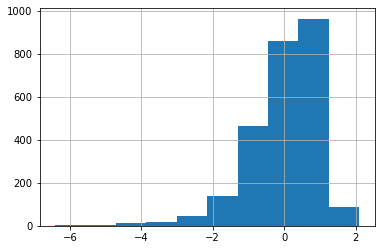

In [30]:
pd.DataFrame(X_train_standardScaler, columns = music_df.columns[4:])["loudness"].hist()

In [31]:
pd.DataFrame(X_test_standardScaler, columns = music_df.columns[4:]).describe()

,loudness,tempo,time_signature,key,mode,duration,avg_timbre1,avg_timbre2,avg_timbre3,avg_timbre4,avg_timbre5,avg_timbre6,avg_timbre7,avg_timbre8,avg_timbre9,avg_timbre10,avg_timbre11,avg_timbre12,var_timbre1,var_timbre2,var_timbre3,var_timbre4,var_timbre5,var_timbre6,var_timbre7,var_timbre8,var_timbre9,var_timbre10,var_timbre11,var_timbre12
count,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000
mean,0.046165,0.024379,-0.015328,0.043777,-0.005591,-0.017487,0.031990,0.010114,-0.010790,0.001198,-0.026742,-0.051600,-0.010171,0.004947,0.015587,0.046997,0.052114,-0.055812,0.049964,-0.012279,-0.041345,-0.013955,-0.035689,-0.023637,-0.022849,0.001328,-0.042779,0.003107,-0.033794,-0.074387
std,0.993144,0.959862,0.927862,0.993258,1.002026,0.813485,1.016041,0.952121,0.978878,0.949604,0.942391,0.968147,0.980706,0.987783,0.928183,0.950809,1.003332,0.949781,1.039535,0.937476,1.001652,1.102822,1.079706,1.029682,0.999064,1.170193,0.867055,1.242317,1.025828,0.872248
min,-6.349619,-2.737158,-2.292661,-1.483668,-1.324974,-2.229024,-5.856854,-4.160404,-4.101085,-3.474298,-3.397523,-2.080769,-4.282794,-4.732928,-3.425955,-3.434355,-9.693125,-3.746796,-1.246646,-1.083722,-1.289900,-1.203367,-1.554759,-1.426473,-1.470006,-1.260026,-1.513560,-1.474042,-1.279757,-1.463558
25%,-0.402426,-0.708961,0.237038,-0.925323,-1.324974,-0.485526,-0.515922,-0.534120,-0.559194,-0.613992,-0.733356,-0.784102,-0.673979,-0.607966,-0.607190,-0.573592,-0.512242,-0.643385,-0.753042,-0.677748,-0.770583,-0.664985,-0.706579,-0.698512,-0.760327,-0.660152,-0.646620,-0.703941,-0.663814,-0.691084
50%,0.254118,-0.125219,0.237038,0.191368,0.754732,-0.153637,0.176893,0.138117,0.044763,-0.048597,-0.076084,-0.207260,-0.048067,0.059667,0.008511,0.099726,0.066763,-0.111655,-0.234746,-0.237520,-0.274122,-0.282012,-0.194387,-0.249848,-0.233839,-0.221208,-0.223812,-0.202059,-0.287142,-0.243420
75%,0.730256,0.590602,0.237038,1.028887,0.754732,0.289612,0.787730,0.685016,0.562197,0.517769,0.694764,0.540147,0.617401,0.627961,0.603712,0.702806,0.610425,0.519665,0.582649,0.347472,0.405362,0.279640,0.367547,0.345228,0.460266,0.397136,0.345716,0.378694,0.299715,0.375072
max,2.097667,3.459438,2.766737,1.587232,0.754732,7.647493,1.849434,2.538377,5.333433,4.701003,2.830254,6.670238,4.019478,3.131010,3.719385,3.298904,4.368449,5.134086,5.871095,6.369703,12.600599,11.049548,18.140174,8.641286,7.609018,11.994807,5.155543,14.759083,8.400602,9.998867


<AxesSubplot:>

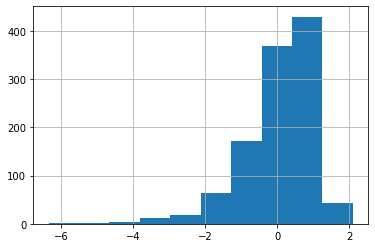

In [32]:
pd.DataFrame(X_test_standardScaler, columns = music_df.columns[4:])["loudness"].hist()

### a. ¿En qué rangos se encontraban anteriormente las variables y en qué rango se encuentran ahora?

#### Analizando los resultados obtenidos sobre los rangos de las variables, inicialmente se observa que para las medidas del dataFrame antes del escalado, en la variable 'loudness' se tenía una media de -7.250650, un valor mínimo de -28.917000 y un valor máximo de -1.550000 y posterior al escalado se obtuvo valores de 2.659829e-16, -6.382044e+00 y 1.679184e+00 respectivamente. Para el valor de la media su variación es alta con respecto al valor inicial, siendo el cambio más drástico observado sobre las tres unidades de medida expuestas. El rango contemplado entre el valor mínimo y máximo varió de una diferencia de 27.367 a 8.061228, siendo alta igualmente. Este comportamiento se observa en las otras variables, en las cuales la variación más alta fue en la medida media y el rango del mínimo y máximo se redujo significativamente.

### ¿Qué otro método de escalamiento podría aplicar?

#### El paquete de sklearn.preprocessing provee clases para el escalado de las variables aparte de StandardScaler(). Entre esos está MinMaxScaler o MaxAbsScaler. La primera consiste en escalar las variables en un rango de mínimo de cero (0) y máximo de uno (1), la última consiste en que el valor absoluto máximo de cada rasgo se escale a la unidad de tamaño.

##### Ejemplo MinMaxScaler 

In [33]:
minScaler = MinMaxScaler()
X_train_minMaxScaler = minScaler.fit_transform( X_train )

In [34]:
X_test_minMaxScaler = minScaler.transform( X_test )

In [35]:
pd.DataFrame(X_train_minMaxScaler, columns = music_df.columns[4:]).describe()

,loudness,tempo,time_signature,key,mode,duration,avg_timbre1,avg_timbre2,avg_timbre3,avg_timbre4,avg_timbre5,avg_timbre6,avg_timbre7,avg_timbre8,avg_timbre9,avg_timbre10,avg_timbre11,avg_timbre12,var_timbre1,var_timbre2,var_timbre3,var_timbre4,var_timbre5,var_timbre6,var_timbre7,var_timbre8,var_timbre9,var_timbre10,var_timbre11,var_timbre12
count,2604.000000,2604.000000,2604.000000,2604.000000,2604.000000,2604.000000,2604.000000,2604.000000,2604.000000,2604.000000,2604.000000,2604.000000,2604.000000,2604.000000,2604.000000,2604.000000,2604.000000,2604.000000,2604.000000,2604.000000,2604.000000,2604.000000,2604.000000,2604.000000,2604.000000,2604.000000,2604.000000,2604.000000,2604.000000,2604.000000
mean,0.753115,0.513628,0.531271,0.483138,0.637097,0.103033,0.755739,0.590614,0.362014,0.355277,0.570242,0.260372,0.593922,0.582856,0.648999,0.550397,0.624218,0.453455,0.125901,0.070078,0.095379,0.084446,0.148711,0.158849,0.116126,0.089938,0.091368,0.099419,0.130857,0.080987
std,0.117352,0.143743,0.169448,0.325700,0.480930,0.045062,0.126652,0.124563,0.081034,0.092999,0.111662,0.107707,0.100392,0.112291,0.079310,0.127688,0.079985,0.078654,0.097950,0.062557,0.074983,0.069854,0.089328,0.109675,0.076171,0.066269,0.058153,0.058369,0.094288,0.055369
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.693142,0.401170,0.571429,0.181818,0.000000,0.080443,0.682904,0.518586,0.317388,0.300392,0.494619,0.176042,0.530361,0.514359,0.600032,0.465809,0.577046,0.405838,0.052646,0.029537,0.040609,0.038675,0.088071,0.084436,0.061444,0.049406,0.056046,0.061435,0.070489,0.043261
50%,0.778211,0.497218,0.571429,0.454545,1.000000,0.096024,0.774383,0.602649,0.364077,0.349088,0.568148,0.249082,0.592585,0.584277,0.648403,0.560412,0.625885,0.448664,0.103498,0.056273,0.080524,0.068618,0.132092,0.131802,0.100911,0.078277,0.079289,0.089276,0.107904,0.071066
75%,0.833737,0.598003,0.571429,0.818182,1.000000,0.116695,0.849838,0.674247,0.407660,0.404054,0.653076,0.325765,0.661184,0.653171,0.698827,0.641170,0.671321,0.498070,0.172477,0.088284,0.128414,0.111802,0.188278,0.206091,0.152716,0.116136,0.112655,0.125361,0.167698,0.106236
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<AxesSubplot:>

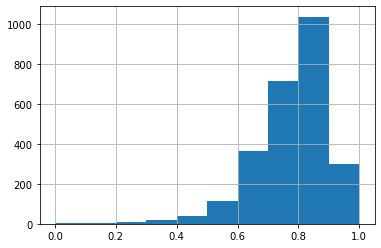

In [36]:
pd.DataFrame(X_train_minMaxScaler, columns = music_df.columns[4:])["loudness"].hist()

In [31]:
pd.DataFrame(X_test_minMaxScaler, columns = music_df.columns[4:]).describe()

,loudness,tempo,time_signature,key,mode,duration,avg_timbre1,avg_timbre2,avg_timbre3,avg_timbre4,avg_timbre5,avg_timbre6,avg_timbre7,avg_timbre8,avg_timbre9,avg_timbre10,avg_timbre11,avg_timbre12,var_timbre1,var_timbre2,var_timbre3,var_timbre4,var_timbre5,var_timbre6,var_timbre7,var_timbre8,var_timbre9,var_timbre10,var_timbre11,var_timbre12
count,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000
mean,0.774286,0.504842,0.528162,0.485011,0.625448,0.232556,0.733900,0.584791,0.321841,0.357519,0.541770,0.272166,0.561004,0.585794,0.588147,0.520740,0.599766,0.454020,0.125996,0.072549,0.172049,0.102499,0.084961,0.168486,0.170911,0.090590,0.092827,0.101836,0.134225,0.078909
std,0.126507,0.141525,0.174813,0.326596,0.484224,0.117686,0.142497,0.122735,0.086548,0.092612,0.125859,0.114340,0.109870,0.115100,0.094772,0.134285,0.091256,0.071902,0.095553,0.060895,0.152485,0.090718,0.049505,0.122874,0.115308,0.074140,0.056727,0.067938,0.102117,0.050328
min,-0.008455,0.000000,0.000000,0.000000,0.000000,0.005828,-0.077279,-0.013217,-0.061477,0.032233,-0.112800,0.030948,-0.077381,0.088371,-0.185534,-0.062520,-0.229799,0.109919,0.004573,0.001966,0.002524,0.000470,0.005576,0.001129,0.000241,-0.001786,0.003930,0.008748,0.001860,0.006324
25%,0.714921,0.397809,0.571429,0.181818,0.000000,0.179964,0.658181,0.516155,0.274480,0.300335,0.453071,0.182417,0.494509,0.513972,0.530599,0.433456,0.552606,0.409503,0.052447,0.030646,0.072128,0.045614,0.050622,0.087370,0.090144,0.046445,0.056041,0.060466,0.070602,0.044557
50%,0.802170,0.482255,0.571429,0.454545,1.000000,0.213647,0.756652,0.598565,0.326447,0.350584,0.536582,0.259245,0.559004,0.587233,0.584600,0.533512,0.604098,0.449978,0.107176,0.057041,0.136877,0.080763,0.074167,0.139743,0.148215,0.077608,0.082443,0.091856,0.108042,0.070128
75%,0.860109,0.583070,0.571429,0.818182,1.000000,0.259422,0.837747,0.669579,0.370597,0.400476,0.634517,0.344920,0.629726,0.657574,0.649568,0.612405,0.649721,0.496228,0.171246,0.092324,0.223334,0.132200,0.108506,0.215028,0.222364,0.116572,0.112706,0.125875,0.168418,0.103547
max,1.033383,0.989314,1.000000,1.000000,1.000000,2.234254,0.989151,0.907373,0.788567,0.925870,1.031877,1.039690,0.976090,0.995918,1.015180,0.969766,0.961959,0.761930,0.841562,0.468474,1.752686,1.168014,0.409317,1.155234,1.437606,0.883484,0.697587,0.960727,1.013212,0.554932


<AxesSubplot:>

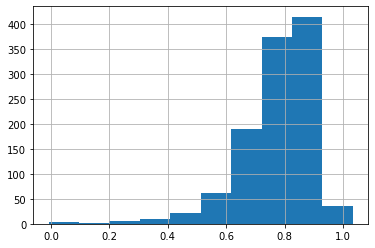

In [37]:
pd.DataFrame(X_test_minMaxScaler, columns = music_df.columns[4:])["loudness"].hist()

##### Ejemplo MaxAbsScaler

In [47]:
maxScaler = MaxAbsScaler([-1,1])
X_train_maxAbsScaler = maxScaler.fit_transform( X_train )

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass copy=[-1, 1] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


In [54]:
X_test_maxAbsScaler = maxScaler.transform( X_test )

In [57]:
pd.DataFrame(X_train_maxAbsScaler, columns = music_df.columns[4:]).describe()

,loudness,tempo,time_signature,key,mode,duration,avg_timbre1,avg_timbre2,avg_timbre3,avg_timbre4,avg_timbre5,avg_timbre6,avg_timbre7,avg_timbre8,avg_timbre9,avg_timbre10,avg_timbre11,avg_timbre12,var_timbre1,var_timbre2,var_timbre3,var_timbre4,var_timbre5,var_timbre6,var_timbre7,var_timbre8,var_timbre9,var_timbre10,var_timbre11,var_timbre12
count,2604.000000,2604.000000,2604.000000,2604.000000,2604.000000,2604.000000,2604.000000,2604.000000,2604.000000,2604.000000,2604.000000,2604.000000,2604.000000,2604.000000,2604.000000,2604.000000,2604.000000,2604.000000,2604.000000,2604.000000,2604.000000,2604.000000,2604.000000,2604.000000,2604.000000,2604.000000,2604.000000,2604.000000,2604.000000,2604.000000
mean,-0.251174,0.511037,0.531490,0.488444,0.640937,0.233357,0.844685,0.168670,0.065469,-0.047889,-0.131192,-0.270926,-0.023680,-0.057012,0.128348,0.163449,-0.014818,0.053478,0.131160,0.072992,0.169551,0.107610,0.095906,0.183420,0.192119,0.103757,0.102632,0.106839,0.152931,0.096367
std,0.115324,0.140047,0.161882,0.324438,0.479818,0.083558,0.080460,0.249595,0.117306,0.147966,0.202864,0.189906,0.184819,0.178999,0.174784,0.235387,0.136350,0.137633,0.100272,0.061306,0.111155,0.080168,0.051917,0.109565,0.103241,0.066850,0.054805,0.060082,0.091239,0.053661
min,-1.000000,0.000000,0.000000,0.000000,0.000000,0.006375,0.402631,-1.000000,-0.379999,-0.623033,-1.000000,-0.735302,-1.000000,-1.000000,-1.000000,-0.763697,-1.000000,-0.725127,0.003674,0.004619,0.015425,0.012307,0.014160,0.023725,0.033438,0.017952,0.014232,0.009292,0.025798,0.017623
25%,-0.309362,0.402726,0.571429,0.181818,0.000000,0.185751,0.799172,0.020794,0.000398,-0.136812,-0.273101,-0.417405,-0.147004,-0.166040,0.016309,0.007351,-0.098009,-0.029896,0.055921,0.032844,0.082534,0.056433,0.062373,0.109514,0.115799,0.063957,0.068428,0.068940,0.094910,0.059131
50%,-0.227409,0.493991,0.571429,0.454545,1.000000,0.219925,0.856429,0.193823,0.068933,-0.056316,-0.136308,-0.293690,-0.028733,-0.051634,0.127862,0.178999,-0.014113,0.044286,0.105339,0.059435,0.147159,0.089107,0.087714,0.157288,0.171306,0.091267,0.090922,0.096151,0.130291,0.086833
75%,-0.170705,0.593131,0.571429,0.818182,1.000000,0.265438,0.905892,0.337961,0.133029,0.034105,0.021901,-0.153251,0.100690,0.055275,0.236082,0.331355,0.066609,0.132771,0.180320,0.092597,0.226033,0.136456,0.117205,0.227943,0.243780,0.129508,0.124945,0.132402,0.188512,0.121326
max,-0.039220,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.994566,1.000000,1.000000,0.615800,1.000000,0.735158,0.620715,0.890804,1.000000,0.642462,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<AxesSubplot:>

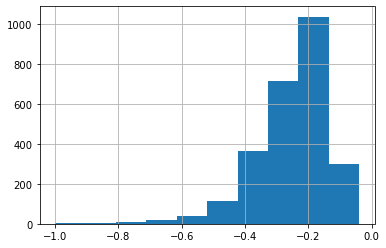

In [58]:
pd.DataFrame(X_train_maxAbsScaler, columns = music_df.columns[4:])["loudness"].hist()

In [56]:
pd.DataFrame(X_test_maxAbsScaler, columns = music_df.columns[4:]).describe()

,loudness,tempo,time_signature,key,mode,duration,avg_timbre1,avg_timbre2,avg_timbre3,avg_timbre4,avg_timbre5,avg_timbre6,avg_timbre7,avg_timbre8,avg_timbre9,avg_timbre10,avg_timbre11,avg_timbre12,var_timbre1,var_timbre2,var_timbre3,var_timbre4,var_timbre5,var_timbre6,var_timbre7,var_timbre8,var_timbre9,var_timbre10,var_timbre11,var_timbre12
count,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000
mean,-0.256082,0.504842,0.528162,0.485011,0.625448,0.237448,0.841040,0.166404,0.064141,-0.042768,-0.124608,-0.263011,-0.026570,-0.050595,0.112070,0.154730,-0.014907,0.058114,0.129207,0.076832,0.184821,0.113545,0.097918,0.188214,0.198634,0.106916,0.105738,0.110182,0.156560,0.095142
std,0.121545,0.141525,0.174813,0.326596,0.484224,0.116936,0.085123,0.244802,0.119436,0.150312,0.203363,0.198415,0.190641,0.186544,0.179195,0.236838,0.149885,0.124040,0.095202,0.060613,0.150133,0.089602,0.048804,0.119958,0.111452,0.072809,0.055919,0.067307,0.099482,0.049441
min,-1.008123,0.000000,0.000000,0.000000,0.000000,0.012166,0.356467,-1.026363,-0.464837,-0.570718,-1.182262,-0.681597,-1.134269,-0.856775,-1.350808,-0.873963,-1.377436,-0.535504,0.008230,0.006576,0.017910,0.012771,0.019657,0.024827,0.033671,0.016198,0.018106,0.017959,0.027610,0.023836
25%,-0.313119,0.397809,0.571429,0.181818,0.000000,0.185191,0.795808,0.029506,-0.001217,-0.135579,-0.267928,-0.418752,-0.141950,-0.166998,0.003260,0.000787,-0.092365,-0.018683,0.055929,0.035123,0.086441,0.057360,0.064065,0.109022,0.120568,0.063563,0.069476,0.069197,0.094579,0.061395
50%,-0.229292,0.482255,0.571429,0.454545,1.000000,0.218660,0.854632,0.193877,0.070498,-0.054023,-0.132991,-0.285434,-0.030041,-0.048263,0.105364,0.177257,-0.007792,0.051141,0.110457,0.061396,0.150191,0.092076,0.087277,0.160152,0.176697,0.094167,0.095502,0.100294,0.131053,0.086516
75%,-0.173625,0.583070,0.571429,0.818182,1.000000,0.264143,0.903075,0.335519,0.131425,0.026952,0.025252,-0.136761,0.092674,0.065740,0.228205,0.316399,0.067142,0.130929,0.174290,0.096516,0.235315,0.142880,0.121130,0.233652,0.248367,0.132431,0.125334,0.133998,0.189871,0.119346
max,-0.007147,0.989314,1.000000,1.000000,1.000000,2.226386,0.993519,0.809815,0.708223,0.879684,0.667307,1.068874,0.693670,0.614100,0.919506,0.946677,0.579980,0.589299,0.842144,0.470929,1.741075,1.165947,0.417681,1.151551,1.422973,0.885576,0.701891,0.961092,1.012871,0.562776


<AxesSubplot:>

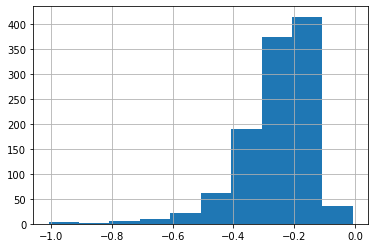

In [59]:
pd.DataFrame(X_test_maxAbsScaler, columns = music_df.columns[4:])["loudness"].hist()

# Regresión Logística

In [18]:
logmodel = LogisticRegression( random_state = 1 )

In [25]:
logmodel.fit( X_train, Y_train.astype( int ) )

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [26]:
logmodel_predictions = logmodel.predict( X_test )

Confusion matrix, without normalization


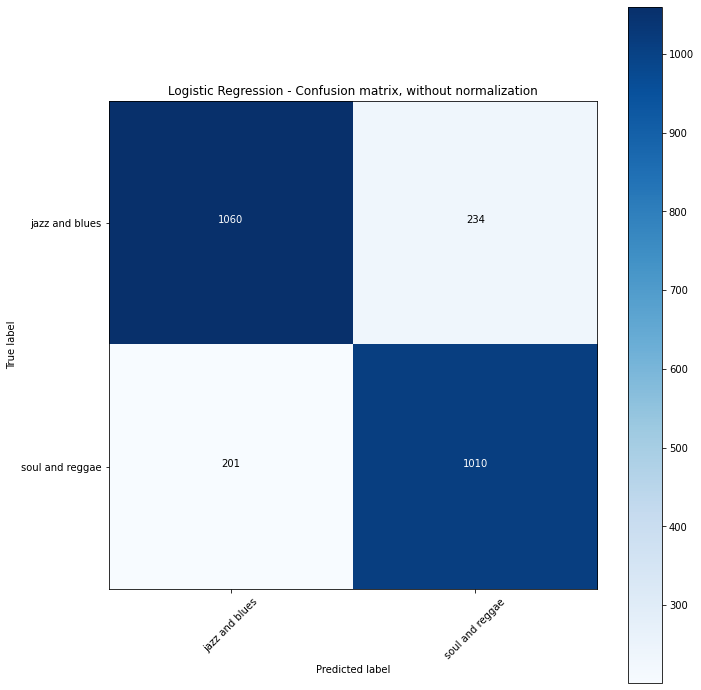

In [27]:
cnf_matrix = confusion_matrix( Y_test.ravel().tolist(), logmodel_predictions.round().tolist() )
np.set_printoptions( precision = 2 )

plt.figure( figsize = ( 10, 10 ) )
plot_confusion_matrix( cnf_matrix, classes = [ 'jazz and blues', 'soul and reggae' ],
                      title = 'Logistic Regression - Confusion matrix, without normalization' )

In [66]:
accuracy_score( Y_test.tolist(), logmodel_predictions )

0.8263473053892215

In [32]:
precision_score( Y_test.tolist(), logmodel_predictions )

0.8118971061093248

# Redes Neuronales

In [57]:
neuralmodel = MLPClassifier( random_state = 1 )

In [58]:
neuralmodel.fit( X_train, Y_train.astype( int ) )

/Users/fabian/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=1, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [59]:
neuralmodel_predictions = neuralmodel.predict( X_test )

Confusion matrix, without normalization


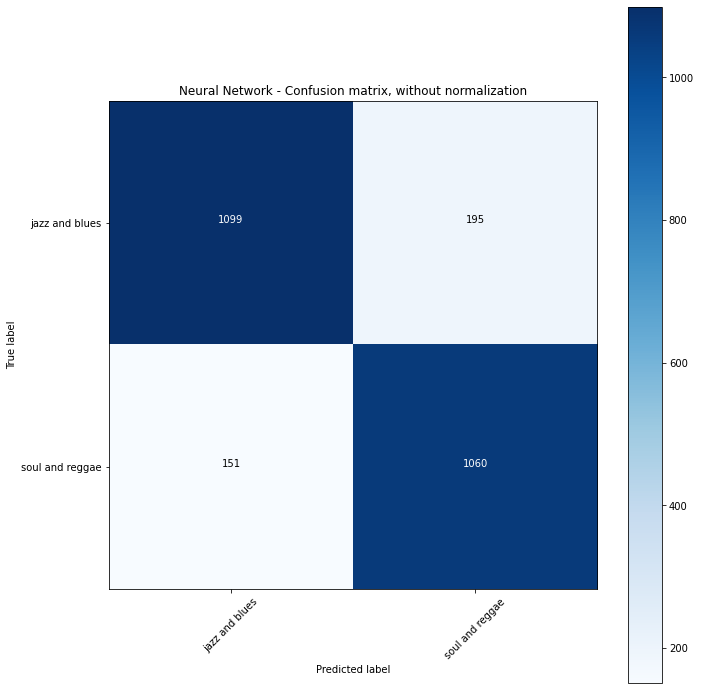

In [60]:
cnf_matrix = confusion_matrix( Y_test.ravel().tolist(), neuralmodel_predictions.round().tolist() )
np.set_printoptions( precision = 2 )

plt.figure( figsize = ( 10, 10 ) )
plot_confusion_matrix( cnf_matrix, classes = [ 'jazz and blues', 'soul and reggae' ],
                      title = 'Neural Network - Confusion matrix, without normalization' )

In [67]:
accuracy_score( Y_test.tolist(), neuralmodel_predictions )

0.86187624750499

In [61]:
precision_score( Y_test.tolist(), neuralmodel_predictions )

0.8446215139442231

# SVM

In [50]:
svmmodel = SVC( random_state = 1 )

In [51]:
svmmodel.fit( X_train, Y_train.astype( int ) )

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=1, shrinking=True, tol=0.001,
    verbose=False)

In [52]:
svmmodel_predictions = svmmodel.predict( X_test )

Confusion matrix, without normalization


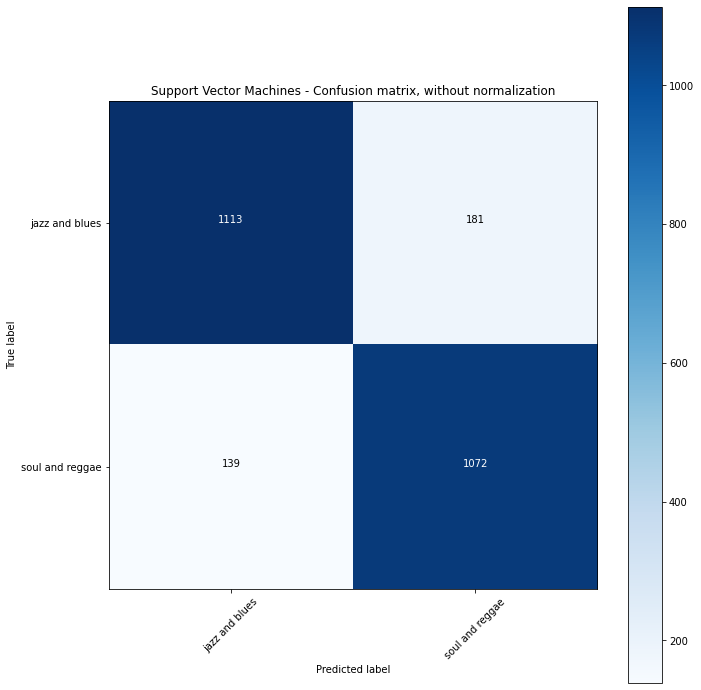

In [53]:
cnf_matrix = confusion_matrix( Y_test.ravel().tolist(), svmmodel_predictions.round().tolist() )
np.set_printoptions( precision = 2 )

plt.figure( figsize = ( 10, 10 ) )
plot_confusion_matrix( cnf_matrix, classes = [ 'jazz and blues', 'soul and reggae' ],
                      title = 'Support Vector Machines - Confusion matrix, without normalization' )

In [68]:
accuracy_score( Y_test.tolist(), svmmodel_predictions )

0.872255489021956

In [54]:
precision_score( Y_test.tolist(), svmmodel_predictions )

0.8555466879489226

# RESPUESTAS

1 iDENTI

¿Cuál debe ser la clase positiva y cuál la clase negativa?